In [15]:
import numpy as np
import matplotlib.pyplot as plt
from   datetime import datetime
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
from scipy import linalg as la
from netCDF4 import Dataset 
from datetime import datetime, timedelta
# import warnings
# warnings.filterwarnings('ignore')
# import os
# os.environ["PROJ_LIB"] = "C:\\Users\\USUARIO\\Anaconda3\\Library\\share"; #fixr
# import mpl_toolkits
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import interp1d

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from pybrain.datasets import SupervisedDataSet,UnsupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.tools.shortcuts import buildNetwork
from pybrain.structure import TanhLayer, SigmoidLayer, LinearLayer
from pybrain.tools.customxml import NetworkWriter
from pybrain.tools.customxml import NetworkReader

import csv
import datetime as dt
import scipy.stats as ss

from scipy.interpolate import interp1d
import glob as glob
from scipy import stats
plt.style.use("seaborn")
import matplotlib as mp
mp.rcParams['xtick.labelsize']=13
mp.rcParams['ytick.labelsize']=13

mp.rcParams['axes.labelsize']=15

In [2]:
def reading_netcdf(ruta):
    data=Dataset(ruta)
    for i in data.variables:
        try:
            print (i,data.variables[i].shape,data.variables[i].units) 
        except:
            print (i,data.variables[i].shape) 
    print("\n")
    data_variables=[np.array(data[i][:]) for i in list(data.variables.keys())]
    return data_variables

In [3]:
rutas = np.array(np.sort(glob.glob("/home/franklin/Documentos/GitHub/TDG/Dataset/Glorys_CMEMS_Monthly/*.nc")),dtype="str")

#Al estar por años se debe concatenar
for i in range(0,len(rutas)):
    if i==0:
        [d,lat,v,temp,u,time,lon,ssh]=reading_netcdf(rutas[i])
    else:
        [d2,lat2,v2,temp2,u2,time2,lon2,ssh2]=reading_netcdf(rutas[i])
        time=np.concatenate((time,time2))

depth (1,) m
latitude (241,) degrees_north
vo (12, 1, 241, 1873) m s-1
thetao (12, 1, 241, 1873) degrees_C
uo (12, 1, 241, 1873) m s-1
time (12,) hours since 1950-01-01
longitude (1873,) degrees_east
zos (12, 241, 1873) m


depth (1,) m
latitude (241,) degrees_north
vo (12, 1, 241, 1873) m s-1
thetao (12, 1, 241, 1873) degrees_C
uo (12, 1, 241, 1873) m s-1
time (12,) hours since 1950-01-01
longitude (1873,) degrees_east
zos (12, 241, 1873) m


depth (1,) m
latitude (241,) degrees_north
vo (12, 1, 241, 1873) m s-1
thetao (12, 1, 241, 1873) degrees_C
uo (12, 1, 241, 1873) m s-1
time (12,) hours since 1950-01-01
longitude (1873,) degrees_east
zos (12, 241, 1873) m


depth (1,) m
latitude (241,) degrees_north
vo (12, 1, 241, 1873) m s-1
thetao (12, 1, 241, 1873) degrees_C
uo (12, 1, 241, 1873) m s-1
time (12,) hours since 1950-01-01
longitude (1873,) degrees_east
zos (12, 241, 1873) m


depth (1,) m
latitude (241,) degrees_north
vo (12, 1, 241, 1873) m s-1
thetao (12, 1, 241, 1873) degrees

In [4]:
da=[datetime(1950,1,1,0,0,0)+timedelta(hours=int(time[w])) for w in range (0,len(time))]
date=pd.DatetimeIndex(da)
# date= np.array(date.to_pydatetime(), dtype=object)

In [2]:
data = pd.read_csv('input_net_region1.csv',delimiter=",").drop(['Unnamed: 0'], axis=1)
# data["month"]=data.index.month
# mean_per_month=data.groupby("month").mean()
# std_per_month=data.groupby("month").std()

In [6]:
(28.079724-27.421751)/0.692940

0.9495381995555147

In [7]:
data

,ssh,t,u,v,ssh_obj,month
1993-01-16 12:00:00,0.472543,28.079724,0.195267,-0.032063,0.304331,1
1993-02-15 00:00:00,0.409803,27.780169,0.236106,0.030256,0.229540,2
1993-03-16 12:00:00,0.405555,27.909916,0.167376,-0.066339,0.191005,3
1993-04-16 00:00:00,0.361863,27.694136,-0.066096,-0.076999,0.268380,4
1993-05-16 12:00:00,0.318402,27.885302,-0.138168,-0.068941,0.391837,5
...,...,...,...,...,...,...
2018-08-16 12:00:00,0.608429,29.098388,0.697272,0.068262,0.381583,8
2018-09-16 00:00:00,0.569632,29.194546,0.463906,0.109480,0.399406,9
2018-10-16 12:00:00,0.584687,29.315145,0.493142,0.040474,0.459039,10
2018-11-16 00:00:00,0.567434,29.045714,0.435514,0.057404,0.513972,11


In [8]:
std_per_month

,ssh,t,u,v,ssh_obj
month,,,,,
1,0.068583,0.692940,0.133683,0.037320,0.040193
2,0.066589,0.666784,0.117755,0.058233,0.050337
3,0.073891,0.717911,0.146039,0.043196,0.046861
4,0.062793,0.579938,0.145612,0.065638,0.070683
5,0.065333,0.565230,0.204327,0.053831,0.056907
6,0.058543,0.518811,0.216307,0.041924,0.051210
7,0.052265,0.411107,0.196934,0.029094,0.045267
8,0.058584,0.438400,0.181703,0.028738,0.036488
9,0.054635,0.546274,0.154894,0.040164,0.048319


In [9]:
for i in range(len(data)):
    for col in data.columns[:-1]:
        mes=data.index[i].month
        data[col][i]=(data[col][i]-mean_per_month[col][mes])/(std_per_month[col][mes])

/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [116]:
data

,ssh,t,u,v,ssh_obj,month
1993-01-16 12:00:00,0.473370,0.949539,-0.837935,-1.643342,0.072660,1
1993-02-15 00:00:00,0.294424,0.755595,0.454528,0.800128,0.056462,2
1993-03-16 12:00:00,0.759383,0.711771,0.688559,-0.038352,-0.278319,3
1993-04-16 00:00:00,0.733468,0.276010,-0.015099,0.706416,-0.081084,4
1993-05-16 12:00:00,-0.301580,0.170100,-0.249629,0.209777,0.534888,5
...,...,...,...,...,...,...
2018-08-16 12:00:00,1.838515,1.109986,1.326526,0.654458,0.778739,8
2018-09-16 00:00:00,1.259672,0.898500,0.530279,1.554454,1.012390,9
2018-10-16 12:00:00,1.426858,1.148143,0.927124,0.500513,1.368543,10
2018-11-16 00:00:00,1.167953,1.129512,0.860894,0.694038,1.599798,11


In [117]:
data[data.columns[:-1]].to_csv("input_net.csv")

In [118]:
def escalamiento(serie):
    serie_escalada=serie/np.max(abs(serie))
#     serie=((serie-np.mean(serie))/np.std(serie))
#     serie_esc=serie/np.max(abs(serie))
    #probar esto
#     serie_anual=serie_esc.rolling(12).mean()[12:]
#     serie_esc=serie-np.mean(serie)
    return serie_escalada

In [122]:
data2=escalamiento(data)
ssh=data2.ssh[:-1]
ssh_obj=data.ssh_obj[1:]
u=data2.u[:-1]
v=data2.v[:-1]
t=data2.t[:-1]

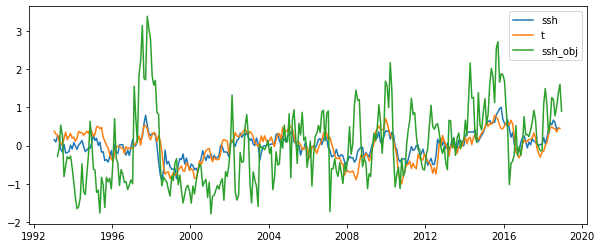

In [123]:
plt.figure(figsize=(10,4))
plt.plot(ssh[:-1],label="ssh")
plt.plot(t,label="t")
# plt.plot(data2.u,label="u")
# plt.plot(data2.v,label="v")
plt.plot(ssh_obj[1:],label="ssh_obj")
plt.legend()

El secreto del éxito : 4,11,11,8,8,2,r,1

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

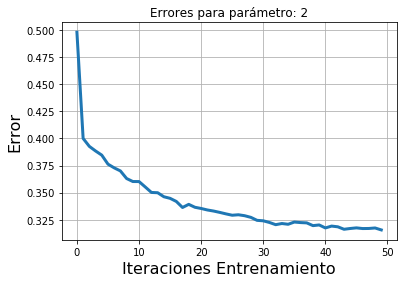

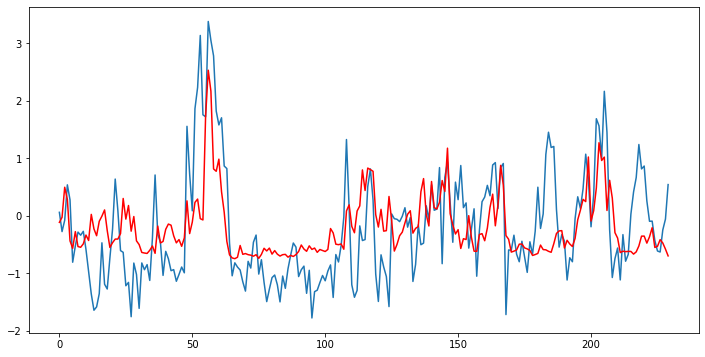

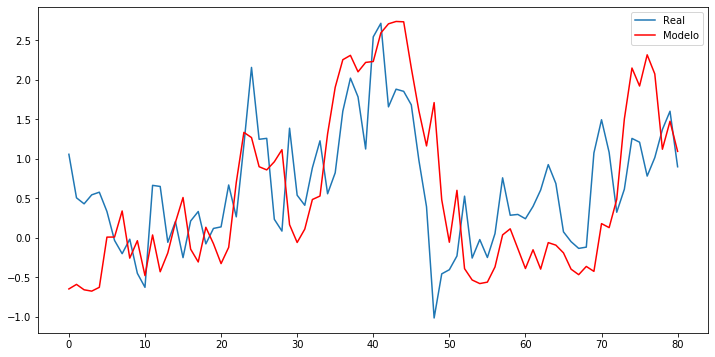

SpearmanrResult(correlation=0.5614530344095494, pvalue=4.9601831054481634e-08)


In [129]:
rango=np.arange(2,3,1)
for r in rango:
    dsCalib=SupervisedDataSet(2,1)
    for p1,p2,res in zip(ssh[:230],u[:230],ssh_obj[:230]):
            dsCalib.addSample((p1,p2),(res,))
    
    ds_test=SupervisedDataSet(2,1)
    for p1,p2,res in zip(ssh[230:],u[230:],ssh_obj[230:]):
            ds_test.addSample((p1,p2),(res,))
    #     1 capa
    entradas, nodos_por_capa1,salidas = 2,r,1
    net = buildNetwork(entradas, nodos_por_capa1,salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida

#         2 capas
#     entradas, nodos_por_capa1,nodos_por_capa2,salidas = 4,2,r,1
#     net = buildNetwork(entradas, nodos_por_capa1,nodos_por_capa2,salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida
    
#     3 capas 
#     entradas, nodos_por_capa1, nodos_por_capa2, nodos_por_capa3,salidas = 2,4,4,r,1
#     net = buildNetwork(entradas, nodos_por_capa1,nodos_por_capa2,nodos_por_capa3,salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida
    
    # 4 capas 
#     entradas, nodos_por_capa1, nodos_por_capa2, nodos_por_capa3, nodos_por_capa4,salidas = 4,4,9,4,r,1
#     net = buildNetwork(entradas, nodos_por_capa1,nodos_por_capa2,nodos_por_capa3, nodos_por_capa4,salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida
    
     # 6 capas 
    # entradas, nodos_por_capa1, nodos_por_capa2, nodos_por_capa3, nodos_por_capa4,nodos_por_capa5,nodos_por_capa6,salidas = 4,6,7,8,8,2,5,1
    # net = buildNetwork(entradas, nodos_por_capa1,nodos_por_capa2,nodos_por_capa3, nodos_por_capa4,nodos_por_capa5,nodos_por_capa6,salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida
    # 
    
    net.reset()

    trainer = BackpropTrainer(net, dsCalib)
    numero_de_conexiones = entradas*nodos_por_capa1 + nodos_por_capa1*salidas    
    iteraciones = 50
    errors = []
    PesosEvol = np.zeros((iteraciones, numero_de_conexiones))
    activacion=[]
    for j in range(iteraciones):
        print (j,end=" ")
        #Entrena y mira como evoluciona el entrenamiento
        errors.append(trainer.train()) #tasa de aprendizaje por defecto 0.01
        Pesos=[]
        for i in net.modules:
            if i.name != 'bias':
                for c in net.connections[i]:
                    Pesos.append(c.params)


        #Guarda la evolucion de los pesos de las entradas
#         Pesos = np.concatenate(np.array(Pesos)).reshape(numero_de_conexiones)
#         PesosEvol[j,:]=Pesos

    plt.figure()
    plt.title("Errores para parámetro: "+str(r))
    plt.plot(errors, lw = 3)
    plt.grid(True)
    plt.xlabel('Iteraciones Entrenamiento', size = 16)
    plt.ylabel('Error', size = 16)
    # plt.yticks([0.1,0.2,0.3,0.4,0.5])
    plt.show()

    resultado=[]
    for i in range(len(u[:230])):
        resultado.append(net.activate((ssh[i],u[i])))
    len(resultado)

    plt.figure(figsize=(12,6))
    x=np.arange(0,len(resultado),1)
    plt.plot(x,ssh_obj[:230])
    plt.plot(x,resultado,'-r')
    # plt.plot(x,activacion[99,:], color='red')
    plt.show()
    
    plt.figure(figsize=(12,6))
    x=np.arange(0,len(ssh[230:]),1)
    plt.plot(x,ssh_obj[230:],label='Real')
    plt.plot(x,net.activateOnDataset(ds_test), color='red',label='Modelo')
    plt.legend()
    plt.show()
    
    y=net.activateOnDataset(ds_test).ravel()
    print(stats.spearmanr(ssh_obj[230:],y))

In [73]:
for mod in net.modules:
    print ("Module:", mod.name) 
    if mod.paramdim > 0:
        print ("--parameters:", mod.params)
    for conn in net.connections[mod]:
        #print conn.params
        print ("-connection to", conn.outmod.name)
        if conn.paramdim > 0:
             print ("- parameters", conn.params) 
    if hasattr(net, "recurrentConns"):
        print ("Recurrent connections")
        for conn in net.recurrentConns:
            print ('nombre',conn.name)

            print ("-", conn.inmod.name, " to", conn.outmod.name)
            if conn.paramdim > 0:
                print ("- parameters", conn.params)

Module: hidden0
-connection to out
- parameters [0.25598445 0.38121537]
Module: in
-connection to hidden0
- parameters [0.04473025 0.72635358 2.5147553  1.26043531]
Module: out
Module: bias
-connection to out
- parameters [-0.06798152]
-connection to hidden0
- parameters [ 2.23439969 -1.04772741]


In [107]:
p = net.params.copy()

# 
# p[0]=0.2649
# p[1]=-1.09
# p[2]=1.4
p[3]=-2 #Desplaza los máximos
p[4]=4
p[5]=3
# p[6]=2
# p[7]=-0.2
# p[8]=1.4
# p[9]=2.8
# p[10]=7.8

net._setParameters(p)
net.params

array([-0.06798152,  2.23439969, -1.04772741, -2.        ,  4.        ,
        3.        ,  1.26043531,  0.25598445,  0.38121537])

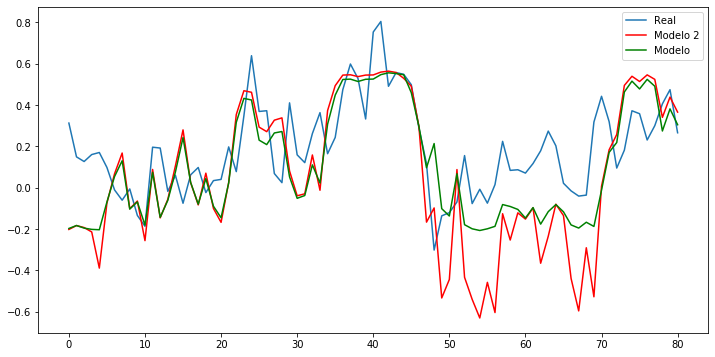

Modelo: 0.5884744155153385
Modelo 2: 0.639253835002482


In [108]:
resultado2=[]
for i in range(len(u[:230])):
    resultado2.append(net.activate((ssh[i],u[i])))
len(resultado2)

y2=net.activateOnDataset(ds_test).ravel()

plt.figure(figsize=(12,6))
x=np.arange(0,len(ssh[230:]),1)
plt.plot(x,ssh_obj[230:],label='Real')
plt.plot(x,y2, color='red',label='Modelo 2')
plt.plot(x,y, color='Green',label='Modelo')
plt.legend()
plt.show()


print("Modelo:",stats.spearmanr(ssh_obj[230:],y)[0])
print("Modelo 2:",stats.spearmanr(ssh_obj[230:],y2)[0])


In [710]:
y=net.activateOnDataset(ds_test).ravel()
stats.spearmanr(ssh_obj[230:],y)

SpearmanrResult(correlation=0.6201932034493803, pvalue=6.631958045628021e-10)

In [21]:
path_redes='/home/franklin/Documentos/GitHub/TDG/Scripts/Redes/'

In [23]:
configuracion = 'escalado en [-0.1, 0.1], hidden y out con LinearLayer, 50 iteraciones, capas = (2,2,1)'
configuracion2 = 'VarE: ssh,u----varS = ssh_obj'
namenet = 'esta_si'
# Pesos = pd.DataFrame(PesosEvol)
# error = pd.DataFrame(errors)

In [24]:
NetworkWriter.writeToFile(net, path_redes+namenet+'.xml')

NameError: name 'net' is not defined

In [662]:
# writer = pd.ExcelWriter(path_redes+namenet+'.xlsx', engine = 'xlsxwriter')
# error.to_excel(writer, sheet_name = 'Errores')
# Pesos.to_excel(writer, sheet_name = 'Pesos')
# worksheet = writer.sheets['Errores']
# worksheet.write(0, 3, configuracion)
# worksheet.write(1, 3, configuracion2)

# writer.save()

In [26]:
netnamecall="esta_si"
net7 = NetworkReader.readFrom(path_redes+netnamecall+'.xml')
p = net7.activateOnDataset(dsCalib)

NameError: name 'dsCalib' is not defined

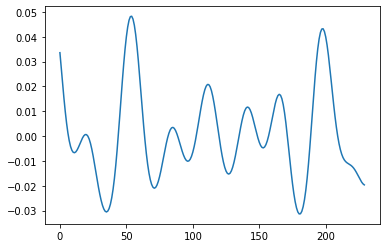

In [220]:
plt.plot(p)

In [1025]:
ds_test=SupervisedDataSet(2,1)
for p1,p2,res in zip(ssh[230:],u[230:],ssh_obj[230:]):
        ds_test.addSample((p1,p2),(res,))

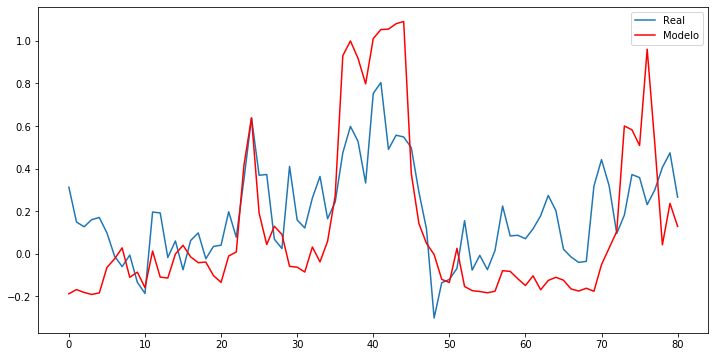

In [771]:
plt.figure(figsize=(12,6))
x=np.arange(0,len(ssh[230:]),1)
plt.plot(x,ssh_obj[230:],label='Real')
plt.plot(x,net.activateOnDataset(ds_test), color='red',label='Modelo')
plt.legend()

In [772]:
y=net.activateOnDataset(ds_test).ravel()
stats.spearmanr(ssh_obj[230:],y)

SpearmanrResult(correlation=0.599687215949124, pvalue=3.3029936877590206e-09)

In [29]:
rango=np.arange(1,13,1)
for r in rango:
    data2=escalamiento(data)
    dsCalib=SupervisedDataSet(4,1) 
    for p1,p2,p3,p4,res in zip(ssh[:230],t[:230],u[:230],v[:230],ssh_obj[:230]):
        dsCalib.addSample((p1,p2,p3,p4),(res,))
#     1 capa
#     entradas, nodos_por_capa1,salidas = 4,2,1
#     net = buildNetwork(entradas, nodos_por_capa1,salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida
    
#     2 capas
#     entradas, nodos_por_capa1,nodos_por_capa2,salidas = 4,2,r,1
#     net = buildNetwork(entradas, nodos_por_capa1,nodos_por_capa2,salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida
    
    # 3 capas 
#     entradas, nodos_por_capa1, nodos_por_capa2, nodos_por_capa3,salidas = 4,2,9,r,1
#     net = buildNetwork(entradas, nodos_por_capa1,nodos_por_capa2,nodos_por_capa3,salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida
    
    # 4 capas 
#     entradas, nodos_por_capa1, nodos_por_capa2, nodos_por_capa3, nodos_por_capa4,salidas = 4,4,2,9,r,1
#     net = buildNetwork(entradas, nodos_por_capa1,nodos_por_capa2,nodos_por_capa3, nodos_por_capa4,salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida

#     # 5 capas 
#     entradas, nodos_por_capa1, nodos_por_capa2, nodos_por_capa3, nodos_por_capa4,nodos_por_capa5,salidas = 4,6,7,10,7,r,1
#     net = buildNetwork(entradas, nodos_por_capa1,nodos_por_capa2,nodos_por_capa3, nodos_por_capa4,nodos_por_capa5,salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida

      # 6 capas 
#     entradas, nodos_por_capa1, nodos_por_capa2, nodos_por_capa3, nodos_por_capa4,nodos_por_capa5,nodos_por_capa6,salidas = 4,11,11,8,8,2,r,1
#     net = buildNetwork(entradas, nodos_por_capa1,nodos_por_capa2,nodos_por_capa3, nodos_por_capa4,nodos_por_capa5,nodos_por_capa6,salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida

    #Entrena la red
    net.reset()

    trainer = BackpropTrainer(net, dsCalib)
    numero_de_conexiones = entradas*nodos_por_capa1 + nodos_por_capa1*salidas    
    iteraciones = 100
    errors = []
    PesosEvol = np.zeros((iteraciones, numero_de_conexiones))
    activacion=[]
    for j in range(iteraciones):
        print (j,end=" ")
        #Entrena y mira como evoluciona el entrenamiento
        errors.append(trainer.train()) #tasa de aprendizaje por defecto 0.01
        activacion.append(net.activateOnDataset(dsCalib))
        Pesos=[]
        for i in net.modules:
            if i.name != 'bias':
                for c in net.connections[i]:
                    Pesos.append(c.params)        
        #Guarda la evolucion de los pesos de las entradas
        Pesos = np.concatenate(np.array(Pesos)).reshape(numero_de_conexiones)
        PesosEvol[j,:]=Pesos
    activacion=np.array(activacion)
    print("\n")
    print(min(errors))
    
    plt.figure()
    plt.title("Errores para parámetro: "+str(r))
    plt.plot(errors, lw = 3)
    plt.grid(True)
    plt.xlabel('Iteraciones Entrenamiento', size = 16)
    plt.ylabel('Error', size = 16)
    plt.yticks([0.1,0.2,0.3,0.4,0.5])
    plt.show()
    
    plt.figure(figsize=(12,6))
    x=np.arange(0,len(activacion[49,:]),1)
    plt.plot(x,ssh_obj[:230])
    plt.plot(x,activacion[99,:], color='red')
    plt.show()
    
    

NameError: name 'escalamiento' is not defined

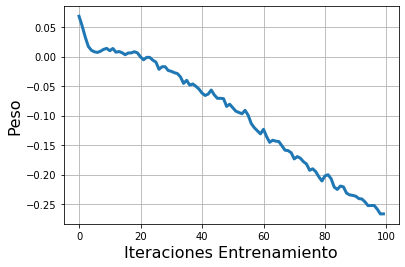

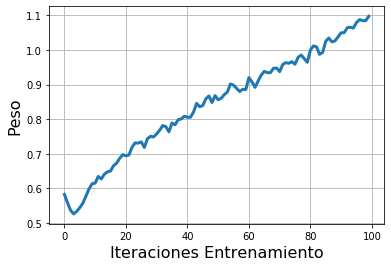

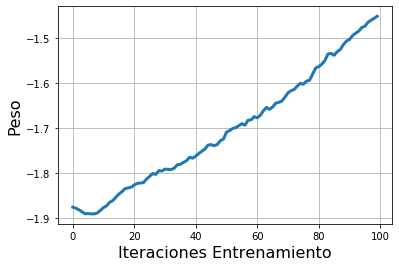

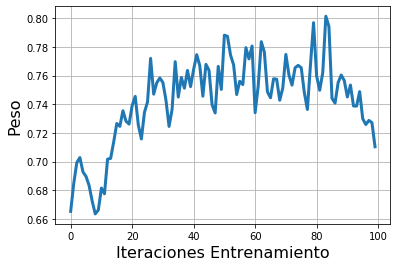

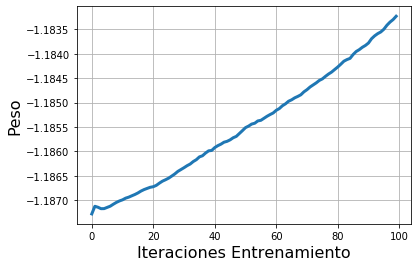

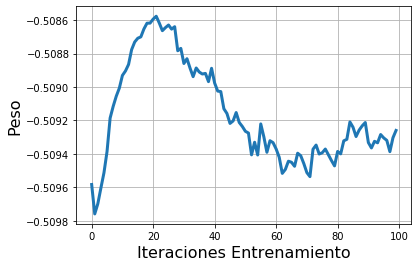

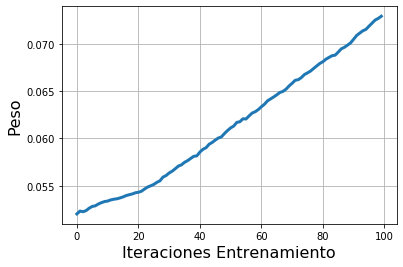

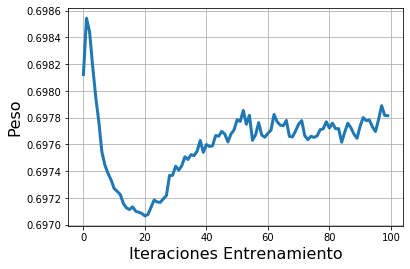

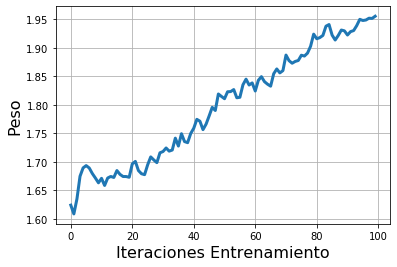

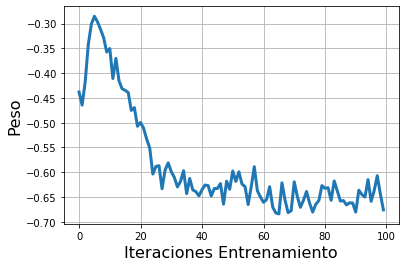

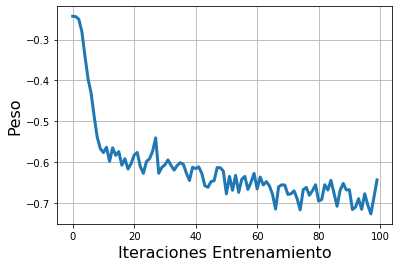

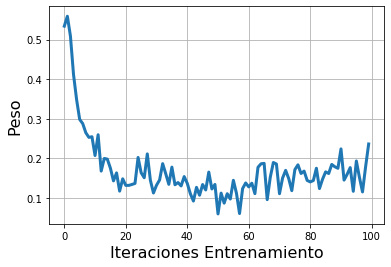

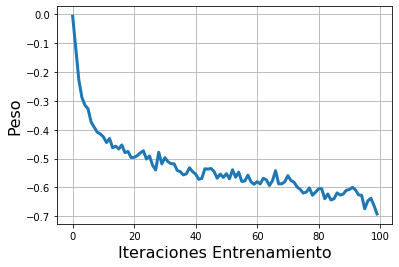

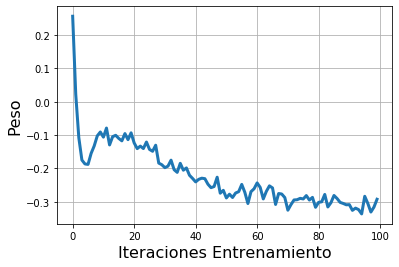

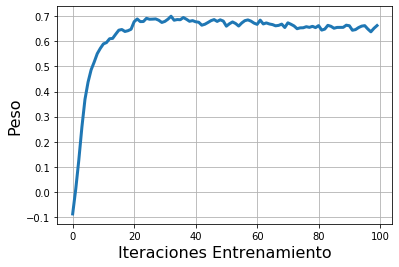

In [357]:
# for i in range(numero_de_conexiones):
#     plt.figure()
#     plt.plot(PesosEvol[:,i], lw = 3)
#     plt.grid(True)
#     plt.xlabel('Iteraciones Entrenamiento', size = 16)
#     plt.ylabel('Peso', size = 16)

In [438]:
data[data.columns[:-2]]

,ssh,t,u,v
1993-01-16 12:00:00,0.473370,0.949539,-0.837935,-1.643342
1993-02-15 00:00:00,0.294424,0.755595,0.454528,0.800128
1993-03-16 12:00:00,0.759383,0.711771,0.688559,-0.038352
1993-04-16 00:00:00,0.733468,0.276010,-0.015099,0.706416
1993-05-16 12:00:00,-0.301580,0.170100,-0.249629,0.209777
...,...,...,...,...
2018-08-16 12:00:00,1.838515,1.109986,1.326526,0.654458
2018-09-16 00:00:00,1.259672,0.898500,0.530279,1.554454
2018-10-16 12:00:00,1.426858,1.148143,0.927124,0.500513
2018-11-16 00:00:00,1.167953,1.129512,0.860894,0.694038


In [441]:
import pandas as pd #Manejo de datos (Importar csv)
import numpy as np
# import keras
import sklearn
from sklearn import metrics 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

#Vector de columnas que se usaran de la BD
col_names=['']		
#lectura de DB
# datos = pd.read_csv(".csv",names=col_names)
datos = pd.read_csv('input_net_region1.csv',delimiter=",").drop(['Unnamed: 0'], axis=1)
#nombre de las columnas de las variables independientes
cols_atributos = ['']
#seleccion de las x1,x2,x3.....
X = datos[data.columns[:-2]][:-1]
#normalizacion de variables cualitativas. se genera una columna en al matriz de entrada por cada etiqueta de una variable cualitativa
# X = pd.get_dummies(X)
#y variable dependiente
y = datos.ssh_obj[1:]
#y = keras.utils.to_categorical(y)
#70% entrenamiento y 30% prueba
#Formulacion del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
#Creación del modelo
model = Sequential()
#Capa de entrada y capa escondida 1
#en input dim se debe configurar segun el tamaño de la matriz de entrada
model.add(Dense(4, input_dim = 4, activation ='relu'))
#Capa escondida 2
model.add(Dense(4, activation ='relu'))
#Capa de salida
model.add(Dense(1,activation='sigmoid'))
#Compilación del modelo
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#Entrenamiento del modelo
model.fit(X_train, y_train, verbose = 0)#,epochs=200,batch_size=20)
#Evaluación
_, accuracy = model.evaluate(X_test, y_test, verbose = 0)

print('Precisión: %.2f' % (accuracy))
#Predicción
predicciones = model.predict(X) #--->Predice con probabilidades
#predicciones = model.predict_classes(X)
prec=pd.DataFrame(data)

ModuleNotFoundError: No module named 'tensorflow'

In [13]:
#CON PREPROCESAMIENTO

def estandarizar(serie):
    ret = (serie - np.mean(serie))/np.std(serie)
    return ret

#para entrenamiento
porc = 0.7
train4 =indices['ANOM.2'].iloc[:int(porc*(len(indices['ANOM.2'])))]
train34 = indices['ANOM.3'].iloc[:int(porc*(len(indices['ANOM.3'])))]
train3 = indices['ANOM.1'].iloc[:int(porc*(len(indices['ANOM.1'])))]
train12 = indices['ANOM'].iloc[:int(porc*(len(indices['ANOM'])))]

NameError: name 'indices' is not defined

In [ ]:
#para test
porc2 = 1 - porc
test4 = indices['ANOM.2'].iloc[-int(porc2*(len(indices['ANOM.2']))):]
test34 = indices['ANOM.3'].iloc[-int(porc2*(len(indices['ANOM.3']))):]
test3 = indices['ANOM.1'].iloc[-int(porc2*(len(indices['ANOM.1']))):]
test12 = indices['ANOM'].iloc[-int(porc2*(len(indices['ANOM']))):]

In [ ]:
#Usar regiones 4, 3.4 y 3 para predecir niño 1.2

dsCalib=SupervisedDataSet(3,1) #tres entradas y una salida


dsCalib3=SupervisedDataSet(3,1) #tres entradas y una salida
dsCalib4=SupervisedDataSet(3,1) #tres entradas y una salida
dsCalib34=SupervisedDataSet(3,1) #tres entradas y una salida


for p1,p2,p3,res in zip(train4, train34, train3, train12):
    dsCalib.addSample((p1,p2,p3),(res,))
    dsCalib3.addSample((p1,p2,p3*0),(res,))
    dsCalib4.addSample((p1*0,p2,p3),(res,))
    dsCalib34.addSample((p1,p2*0,p3),(res,))

#Monta la red
entradas, nodos_por_capa1, salidas = 3,2,1
net = buildNetwork(entradas, nodos_por_capa1, salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida

#Entrena la red
net.reset()

trainer = BackpropTrainer(net, dsCalib)
numero_de_conexiones = entradas*nodos_por_capa1 + nodos_por_capa1*salidas

In [ ]:
net.modulesSorted

In [ ]:
for i in net.modules:
    print(i)
    if i.name != 'bias':
        for c in net.connections[i]:
            print(c)
            print(c.params)


In [ ]:
widest_layer = max([layer.dim for layer in net.modules])
widest_layer

In [ ]:
#     def draw(self):
#         widest_layer = max([layer.dim for layer in self.neural_network.modules])
#         network = NeuralNetwork(widest_layer)
#         for layer in self.neural_network.modulesSorted:
#             if type(layer) is BiasUnit:
#                 continue
#             network.add_layer(layer.dim)
#         network.draw()

In [ ]:
class NeuralNetwork():
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

    def draw(self):
        pyplot.figure()
        for i in range(len(self.layers)):
            layer = self.layers[i]
            if i == len(self.layers) - 1:
                i = -1
            layer.draw(i)
        pyplot.axis('scaled')
        pyplot.axis('off')
        pyplot.title('Neural Network architecture', fontsize=15)
        pyplot.show()

In [149]:
sla=data.ssh_obj-np.mean(data.ssh_obj)

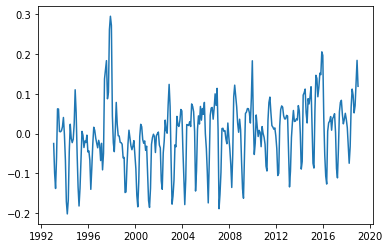

In [150]:
plt.plot(sla)

In [16]:
def filtrar(serie):
    freq= np.fft.fftfreq(len(serie))
    fft = np.fft.fft(serie.values)
    fft_filt = np.copy(fft)
    fft_filt[np.where((np.abs(1/freq)>(12*6)) | \
                              (np.abs(1/freq)<((12*2))))]=0
    serie_filt=np.real(np.fft.ifft(fft_filt))
    return serie_filt

In [17]:
data.ssh=filtrar(data.ssh)
data.ssh_obj=filtrar(data.ssh_obj)
data.u=filtrar(data.u)
data.v=filtrar(data.v)
data.t=filtrar(data.t)

/home/franklin/my_projects_dir/entorno_jup/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


In [18]:
# plt.plot(ssh_filt)
# plt.plot(ssh_obj_filt,c='r')
# plt.plot(t_filt)

In [19]:
def escalamiento(serie):
    serie_escalada=serie/np.max(abs(serie))
#     serie=((serie-np.mean(serie))/np.std(serie))
#     serie_esc=serie/np.max(abs(serie))
    #probar esto
#     serie_anual=serie_esc.rolling(12).mean()[12:]
#     serie_esc=serie-np.mean(serie)
    return serie_escalada

In [20]:
data

,ssh,t,u,v,ssh_obj
0,0.045267,0.327289,0.108769,0.012171,0.043789
1,0.038644,0.310107,0.084962,0.012493,0.040974
2,0.031600,0.286581,0.062168,0.012558,0.037600
3,0.024436,0.258209,0.041114,0.012302,0.033727
4,0.017442,0.226655,0.022379,0.011670,0.029421
...,...,...,...,...,...
307,0.062196,0.284049,0.211241,0.009075,0.047796
308,0.061774,0.311596,0.196195,0.009683,0.048487
309,0.059667,0.329524,0.177450,0.010354,0.048388
310,0.056055,0.337832,0.155971,0.011034,0.047543


In [21]:
data2=escalamiento(data)
ssh=data2.ssh[:-1]
ssh_obj=data.ssh_obj[1:]
u=data2.u[:-1]
v=data2.v[:-1]
t=data2.t[:-1]

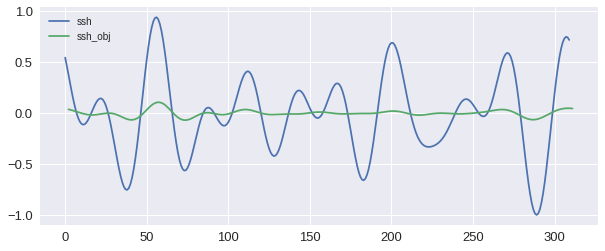

In [22]:
plt.figure(figsize=(10,4))
plt.plot(ssh[:-1],label="ssh")
# plt.plot(t,label="t")
# plt.plot(u,label="u")
# plt.plot(v,label="v")
plt.plot(ssh_obj[1:],label="ssh_obj")
plt.legend()

In [40]:
dsCalib=SupervisedDataSet(2,1)
for p1,p2,res in zip(ssh[:230],u[:230],ssh_obj[:230]):
        dsCalib.addSample((p1,p2),(res,))

In [41]:
ds_test=SupervisedDataSet(2,1)
for p1,p2,res in zip(ssh[230:],u[230:],ssh_obj[230:]):
        ds_test.addSample((p1,p2),(res,))

In [42]:
path_redes='/home/franklin/Documentos/GitHub/TDG/Scripts/Redes/'

In [43]:
netnamecall="esta_si"
net7 = NetworkReader.readFrom(path_redes+netnamecall+'.xml')
p = net7.activateOnDataset(dsCalib)

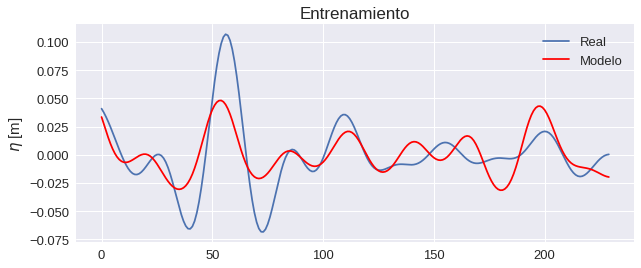

In [44]:
plt.figure(figsize=(10,4))
x=np.arange(0,len(p),1)
plt.title("Entrenamiento",fontsize=17)
plt.plot(x,ssh_obj[:230],label="Real")
plt.plot(x,p,'-r',label="Modelo")
plt.ylabel("$\eta$ [m] ")
# plt.plot(x,activacion[99,:], color='red')
plt.legend(prop={"size":13})
plt.savefig("../Plots/red_train.png",dpi=800,box_inches="tight",pad_inches=0)
plt.show()

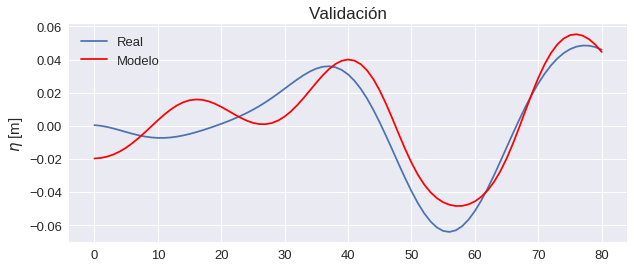

In [45]:
plt.figure(figsize=(10,4))
plt.title("Validación",fontsize=17)
x=np.arange(0,len(ssh[230:]),1)
plt.plot(x,ssh_obj[230:],label='Real')
y=net7.activateOnDataset(ds_test)
plt.plot(x,y,'-r',label='Modelo')
plt.legend(prop={'size':13})
plt.ylabel("$\eta$ [m] ")
# plt.show()
plt.savefig("../Plots/red_test.png",dpi=800,box_inches="tight",pad_inches=0)

In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(ssh_obj[230:], y))

In [47]:
rms

0.012624464025846752

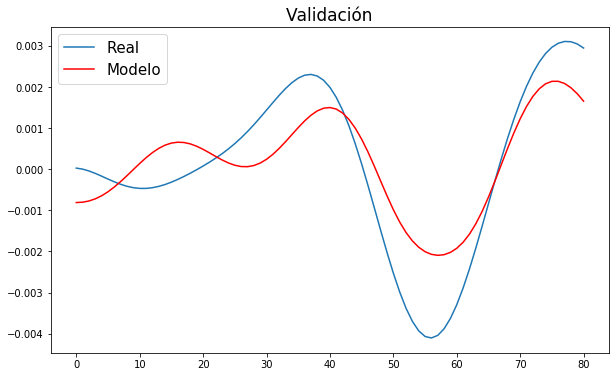

In [162]:
plt.figure(figsize=(10,6))
plt.title("Validación",fontsize=17)
x=np.arange(0,len(ssh[230:]),1)
plt.plot(x,ssh_obj[230:]*max(np.abs(ssh_obj[230:])),label='Real')
y=net7.activateOnDataset(ds_test)
plt.plot(x,y*max(np.abs(y)),'-r',label='Modelo')
plt.legend(prop={'size':15})
plt.show()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

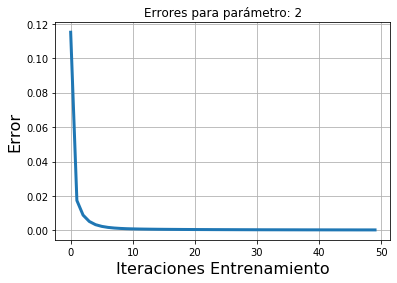

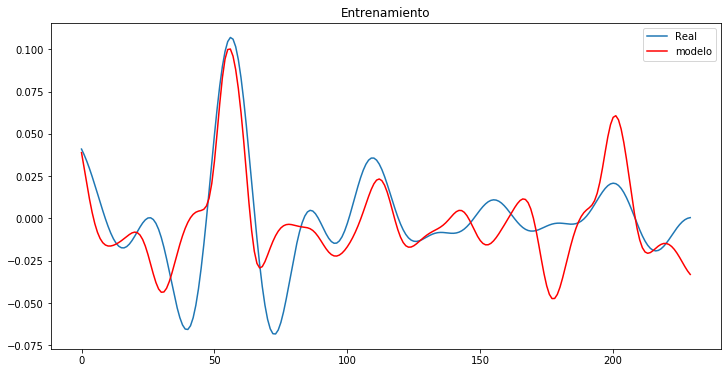

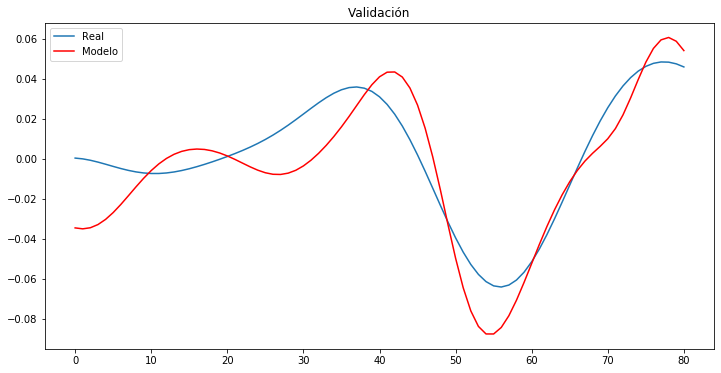

SpearmanrResult(correlation=0.8306233062330622, pvalue=8.756879166341068e-22)


In [149]:
rango=np.arange(2,3,1)
for r in rango:
    ds_test=SupervisedDataSet(2,1)
    for p1,p2,res in zip(ssh[230:],u[230:],ssh_obj[230:]):
            ds_test.addSample((p1,p2),(res,))
    #     1 capa
    entradas, nodos_por_capa1,salidas = 2,3,1
    net = buildNetwork(entradas, nodos_por_capa1,salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida

#         2 capas
#     entradas, nodos_por_capa1,nodos_por_capa2,salidas = 4,2,r,1
#     net = buildNetwork(entradas, nodos_por_capa1,nodos_por_capa2,salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida
    
#     3 capas 
#     entradas, nodos_por_capa1, nodos_por_capa2, nodos_por_capa3,salidas = 2,4,4,r,1
#     net = buildNetwork(entradas, nodos_por_capa1,nodos_por_capa2,nodos_por_capa3,salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida
    
    # 4 capas 
#     entradas, nodos_por_capa1, nodos_por_capa2, nodos_por_capa3, nodos_por_capa4,salidas = 4,4,9,4,r,1
#     net = buildNetwork(entradas, nodos_por_capa1,nodos_por_capa2,nodos_por_capa3, nodos_por_capa4,salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida
    
     # 6 capas 
    # entradas, nodos_por_capa1, nodos_por_capa2, nodos_por_capa3, nodos_por_capa4,nodos_por_capa5,nodos_por_capa6,salidas = 4,6,7,8,8,2,5,1
    # net = buildNetwork(entradas, nodos_por_capa1,nodos_por_capa2,nodos_por_capa3, nodos_por_capa4,nodos_por_capa5,nodos_por_capa6,salidas, bias=True, hiddenclass=TanhLayer) #entrada, nodos en c/ capa, salida
    # 
    
    net.reset()

    trainer = BackpropTrainer(net, dsCalib)
    numero_de_conexiones = entradas*nodos_por_capa1 + nodos_por_capa1*salidas    
    iteraciones = 50
    errors = []
    PesosEvol = np.zeros((iteraciones, numero_de_conexiones))
    activacion=[]
    for j in range(iteraciones):
        print (j,end=" ")
        #Entrena y mira como evoluciona el entrenamiento
        errors.append(trainer.train()) #tasa de aprendizaje por defecto 0.01
        Pesos=[]
        for i in net.modules:
            if i.name != 'bias':
                for c in net.connections[i]:
                    Pesos.append(c.params)


        #Guarda la evolucion de los pesos de las entradas
#         Pesos = np.concatenate(np.array(Pesos)).reshape(numero_de_conexiones)
#         PesosEvol[j,:]=Pesos

    plt.figure()
    plt.title("Errores para parámetro: "+str(r))
    plt.plot(errors, lw = 3)
    plt.grid(True)
    plt.xlabel('Iteraciones Entrenamiento', size = 16)
    plt.ylabel('Error', size = 16)
    # plt.yticks([0.1,0.2,0.3,0.4,0.5])
    plt.show()

    resultado=[]
    for i in range(len(u[:230])):
        resultado.append(net.activate((ssh[i],u[i])))
    len(resultado)

    plt.figure(figsize=(12,6))
    x=np.arange(0,len(resultado),1)
    plt.title("Entrenamiento")
    plt.plot(x,ssh_obj[:230],label="Real")
    plt.plot(x,resultado,'-r',label="modelo")
    # plt.plot(x,activacion[99,:], color='red')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(12,6))
    plt.title("Validación")
    x=np.arange(0,len(ssh[230:]),1)
    plt.plot(x,ssh_obj[230:],label='Real')
    plt.plot(x,net.activateOnDataset(ds_test),'-r',label='Modelo')
    plt.legend()
    plt.show()
    
    y=net.activateOnDataset(ds_test).ravel()
    print(stats.spearmanr(ssh_obj[230:],y))

In [150]:
for mod in net.modules:
    print ("Module:", mod.name) 
    if mod.paramdim > 0:
        print ("--parameters:", mod.params)
    for conn in net.connections[mod]:
        #print conn.params
        print ("-connection to", conn.outmod.name)
        if conn.paramdim > 0:
             print ("- parameters", conn.params) 
    if hasattr(net, "recurrentConns"):
        print ("Recurrent connections")
        for conn in net.recurrentConns:
            print ('nombre',conn.name)

            print ("-", conn.inmod.name, " to", conn.outmod.name)
            if conn.paramdim > 0:
                print ("- parameters", conn.params)

Module: in
-connection to hidden0
- parameters [ 1.07957009  0.68478261 -1.54008706  0.68970947  0.5170824  -0.72065153]
Module: bias
-connection to out
- parameters [-0.17267304]
-connection to hidden0
- parameters [-0.86657929  1.0125645  -1.00209271]
Module: out
Module: hidden0
-connection to out
- parameters [-0.02936447 -0.19308493 -0.38197828]


In [155]:
p = net.params.copy()

# 
# p[0]=0.2649
# p[1]=-1.09
# p[2]=1.4
# p[3]=-0.20122 #Desplaza los máximos
p[4]=1.7
p[5]=0.68
p[6]=-1.54
# p[7]=-0.2
# p[8]=1.4
# p[9]=2.8
# p[10]=7.8

net._setParameters(p)
net.params

array([-0.17267304, -0.86657929,  1.0125645 , -1.00209271,  1.7       ,
        0.68      , -1.54      ,  0.68970947,  0.5170824 , -0.72065153,
       -0.02936447, -0.19308493, -0.38197828])

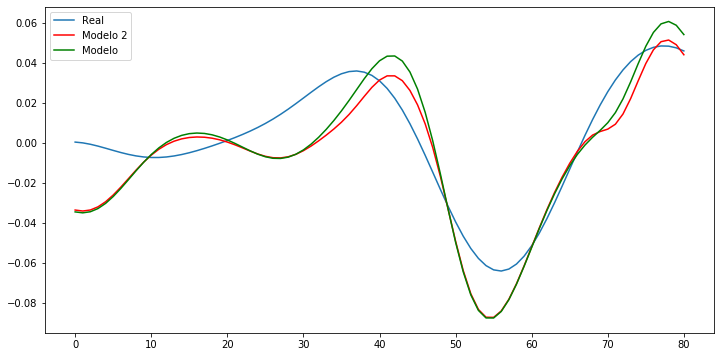

Modelo: 0.8306233062330622
Modelo 2: 0.8338527551942186


In [156]:
resultado2=[]
for i in range(len(u[:230])):
    resultado2.append(net.activate((ssh[i],u[i])))
len(resultado2)

y2=net.activateOnDataset(ds_test).ravel()

plt.figure(figsize=(12,6))
x=np.arange(0,len(ssh[230:]),1)
plt.plot(x,ssh_obj[230:],label='Real')
plt.plot(x,y2, color='red',label='Modelo 2')
plt.plot(x,y, color='Green',label='Modelo')
plt.legend()
plt.show()


print("Modelo:",stats.spearmanr(ssh_obj[230:],y)[0])
print("Modelo 2:",stats.spearmanr(ssh_obj[230:],y2)[0])
